# Support Vector Regression (SVR)

## Importing the libraries

In [671]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [672]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [673]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [674]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [675]:
y = y.reshape(len(y),1) #Rows, columns

In [676]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [677]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [678]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [679]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [680]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\users\alsen\pycharmprojects\venv\machinelearningcourse\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [681]:
predicted = sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])
print(predicted)


[[170370.0204065]]


## Visualising the SVR results

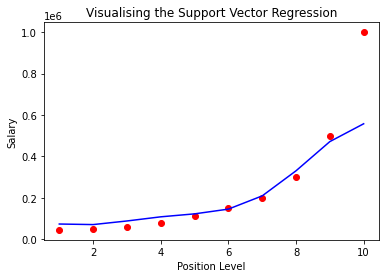

In [682]:
X_inverted = sc_X.inverse_transform(X)
y_inverted = sc_y.inverse_transform(y)

y_pred = regressor.predict(X)
y_pred = sc_y.inverse_transform([y_pred])
y_pred = y_pred.reshape((len(y),1))

plt.scatter(X_inverted, y_inverted, color='red')
plt.plot(X_inverted, y_pred, color='blue')
plt.title('Visualising the Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

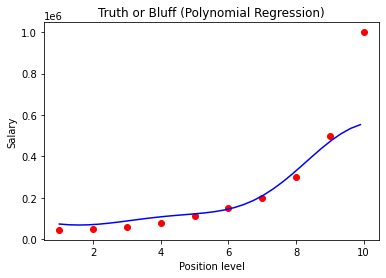

In [683]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid_inverted = sc_X.inverse_transform(X_grid)

y_pred_grid = regressor.predict(X_grid)
y_pred_grid = sc_y.inverse_transform([y_pred_grid])
y_pred_grid = y_pred_grid.reshape((len(X_grid),1))

plt.scatter(X_inverted, y_inverted, color='red')
plt.plot(X_grid_inverted, y_pred_grid, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()